# Laboratorio 03: Raíces.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Candy Valentina López Villanueva
*Métodos computacionales 2025-I*

---

# 1

La ecuación de Kepler juega un papel importante en la mecánica celeste, ya que permite el calculo de la posición angular de objetos orbitantes. Para todas las órbitas elipticas, la ecuación

$$M = E- e\sin(E)$$

siendo $M$ la anomalía media, $E$ la anomalía excéntrica y $e$ la excentricidad ($e= \sqrt{1-b/a}$) (con $a>b$ los semiejes). Los astrónomos definen las "anomalías"  como posiciones angulares: la anomalía media $M$ es la posición angular del objeto en una órbita circular ficticia y, suponiendo una velocidad angular constante, puede relacionarse con el lapso de tiempo transcurrido desde el paso por el perihelio

$$M= \frac{2\pi}{T} (t-t_0)$$

donde $T$ es el periodo orbital y $t_0$ el tiempo cuando el objeto está en el perihelio.

Para el cometa Halley $e=0.9672671$, $T=75.96000$ años y $t_0=1986.1113$ años (Febrero 9 de 1986).

* Encuentre $E$ para el cometa Halley el 1 de abril de 1986. Para esto, haga una gráfica de

$$f(E) = E - e\sin(E) - M$$

para $E\in [0,1]$.

* Grafique $E=E(t)$ para todo un periodo de revolución y resuelva usando el método de Newton y secante

$$E-e\sin(E) - M(t) = 0$$

con un paso de $\Delta t = T/100$. $t_i = t_0 + (i)*\Delta t$, comenzando en $E(t_0) = 0$

✅ Paso 1: Calcular la anomalía media M para el 1 de abril de 1986

Sabemos:

•	$T$ = 75.96 años

•	$t_0$ = 1986.1113 años

•	$t = 1986 + \frac{31+1}{365.25} \approx 1986.2521$ (el 1 de abril es el día 91 del año)

Entonces:

$M = \frac{2\pi}{T}(t - t_0)$


Ahora, grafiquemos $f(E) = E - e \sin(E) - M$ en el intervalo $E \in [0,1]$

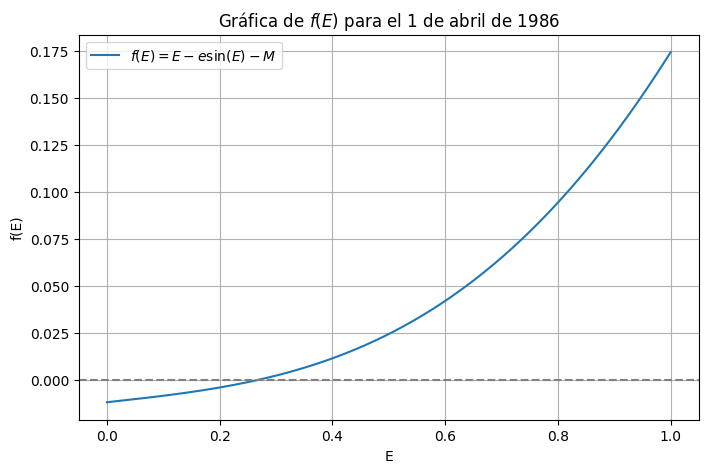

In [2]:
#Aquí va su código
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del cometa Halley
e = 0.9672671
T = 75.96
t0 = 1986.1113
t = 1986.2521  # 1 de abril de 1986

# Cálculo de M
M = (2 * np.pi / T) * (t - t0)

# Definimos la función f(E)
def f(E):
    return E - e * np.sin(E) - M

# Dominio E en [0,1]
E_vals = np.linspace(0, 1, 1000)
f_vals = f(E_vals)

# Gráfica
plt.figure(figsize=(8, 5))
plt.plot(E_vals, f_vals, label=r'$f(E) = E - e\sin(E) - M$')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Gráfica de $f(E)$ para el 1 de abril de 1986')
plt.xlabel('E')
plt.ylabel('f(E)')
plt.grid(True)
plt.legend()
plt.show()

Luego, vamos a resolver la ecuación de Kepler:

$f(E) = E - e \sin(E) - M(t) = 0$

usando dos métodos numéricos: el método de Newton y el método de la secante, para 100 valores de $t$ en un periodo orbital.

In [3]:
# Definimos M(t)
def M_func(t):
    return (2 * np.pi / T) * (t - t0)

# Derivada de f(E) para el método de Newton
def f_prime(E):
    return 1 - e * np.cos(E)

In [4]:
def newton_method(M, E0=0.5, tol=1e-10, max_iter=100):
    E = E0
    for _ in range(max_iter):
        f_E = E - e * np.sin(E) - M
        fp_E = 1 - e * np.cos(E)
        E_new = E - f_E / fp_E
        if abs(E_new - E) < tol:
            return E_new
        E = E_new
    return E  # en caso de no converger

In [5]:
def secant_method(M, E0=0.5, E1=0.6, tol=1e-10, max_iter=100):
    for _ in range(max_iter):
        f0 = E0 - e * np.sin(E0) - M
        f1 = E1 - e * np.sin(E1) - M
        if abs(f1 - f0) < 1e-14:  # evitar división por cero
            return E1
        E2 = E1 - f1 * (E1 - E0) / (f1 - f0)
        if abs(E2 - E1) < tol:
            return E2
        E0, E1 = E1, E2
    return E1

Recorrer todo el periodo $t_i = t_0 + i \cdot \Delta t$

In [6]:
# Tiempo y solución
dt = T / 100
t_values = np.array([t0 + i * dt for i in range(101)])

E_newton_vals = []
E_secant_vals = []

for t_i in t_values:
    M_i = M_func(t_i)
    E_n = newton_method(M_i)
    E_s = secant_method(M_i)
    E_newton_vals.append(E_n)
    E_secant_vals.append(E_s)

Graficar $E(t)$

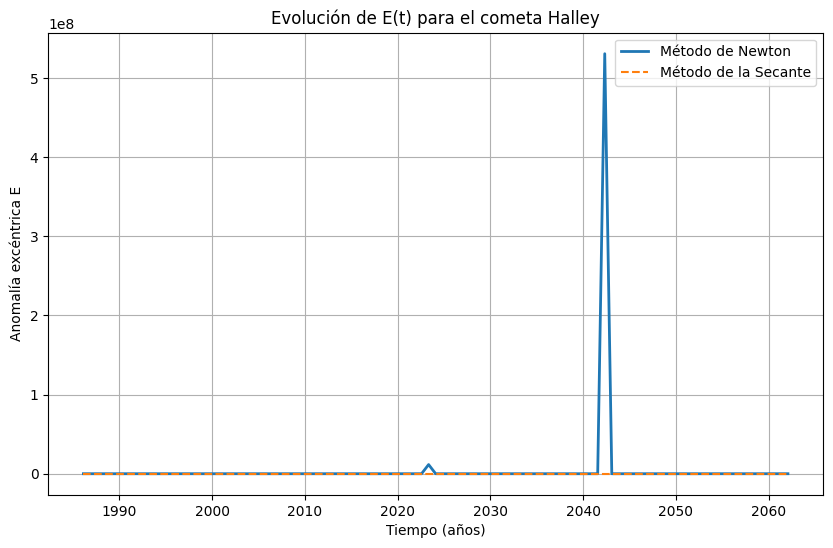

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(t_values, E_newton_vals, label='Método de Newton', lw=2)
plt.plot(t_values, E_secant_vals, label='Método de la Secante', linestyle='--')
plt.xlabel('Tiempo (años)')
plt.ylabel('Anomalía excéntrica E')
plt.title('Evolución de E(t) para el cometa Halley')
plt.grid(True)
plt.legend()
plt.show()

# 2
En la teoria de campo medio, la magnetización como función de la temperatura de un material magnético puede ser calculada como:

$$
m(T) = \tanh\left( \frac{m(T)}{T} \right)
$$

donde $m$ y $T$ son la magnetizacion y temperatura reducida respectivamente


Para $T = 0.5$, determine:

- La magnetización reducida empleando el metodo de la secante y Newton-Raphson (Muestre su resultado con 4 cifras).

- Valide su respuestado con el metodo de punto fijo (Muestre su resultado con 4 cifras).

Ahora, defina `T = np.linspace(0.1,0.99,100)`, y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.

La ecuación:

$m(T) = \tanh\left( \frac{m(T)}{T} \right)$

es implícita en $m$, así que se debe resolver numéricamente para un valor dado de $T$.

Reescribimos la ecuación como función para encontrar ceros:

$f(m) = \tanh\left(\frac{m}{T}\right) - m$

Buscamos las raíces de $f(m) = 0$, con $T = 0.5$

In [8]:
#Aquí va su código
import numpy as np
import matplotlib.pyplot as plt

T_fixed = 0.5

# Definimos f(m) y su derivada para Newton-Raphson
def f_m(m, T):
    return np.tanh(m / T) - m

def f_m_prime(m, T):
    return (1 / T) * (1 - np.tanh(m / T) ** 2) - 1

In [9]:
def newton_magnetization(T, m0=0.5, tol=1e-10, max_iter=100):
    m = m0
    for _ in range(max_iter):
        f_val = f_m(m, T)
        f_der = f_m_prime(m, T)
        m_new = m - f_val / f_der
        if abs(m_new - m) < tol:
            return round(m_new, 4)
        m = m_new
    return round(m, 4)

In [10]:
def secant_magnetization(T, m0=0.5, m1=0.6, tol=1e-10, max_iter=100):
    for _ in range(max_iter):
        f0 = f_m(m0, T)
        f1 = f_m(m1, T)
        if abs(f1 - f0) < 1e-14:
            return round(m1, 4)
        m2 = m1 - f1 * (m1 - m0) / (f1 - f0)
        if abs(m2 - m1) < tol:
            return round(m2, 4)
        m0, m1 = m1, m2
    return round(m1, 4)

In [11]:
def fixed_point_magnetization(T, m0=0.5, tol=1e-10, max_iter=100):
    m = m0
    for _ in range(max_iter):
        m_new = np.tanh(m / T)
        if abs(m_new - m) < tol:
            return round(m_new, 4)
        m = m_new
    return round(m, 4)

In [12]:
m_newton = newton_magnetization(T_fixed)
m_secant = secant_magnetization(T_fixed)
m_fixed = fixed_point_magnetization(T_fixed)

print(f"Newton-Raphson: m = {m_newton}")
print(f"Método de la Secante: m = {m_secant}")
print(f"Método de Punto Fijo: m = {m_fixed}")

Newton-Raphson: m = 0.9575
Método de la Secante: m = 0.9575
Método de Punto Fijo: m = 0.9575


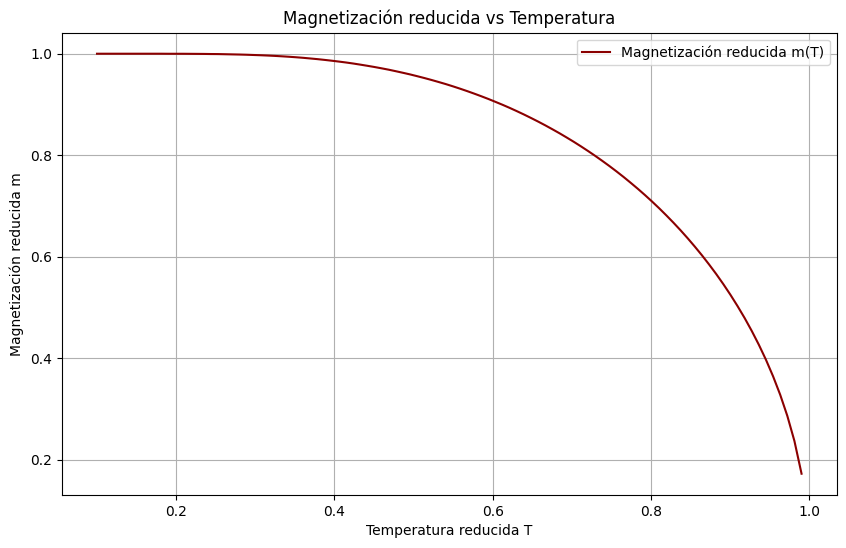

In [13]:
T_vals = np.linspace(0.1, 0.99, 100)
m_vals = [secant_magnetization(T) for T in T_vals]

plt.figure(figsize=(10, 6))
plt.plot(T_vals, m_vals, label='Magnetización reducida m(T)', color='darkred')
plt.xlabel('Temperatura reducida T')
plt.ylabel('Magnetización reducida m')
plt.title('Magnetización reducida vs Temperatura')
plt.grid(True)
plt.legend()
plt.show()

# 3

La energía libre de Gibbs para 1 mol de hidrógeno a una temperatura $T$ está dada por:

$$G = -RT \ln \left[ \left( \frac{T}{T_0} \right)^{5/2} \right]$$

donde:  
- $ R = 8.314 \, \text{J/K} $ es la constante de los gases.  
- $ T_0 = 4.444 \, \text{J/K} $ es una constante de referencia.  

Determinar la temperatura $ T $ a la cual $ G = -10^5 \, \text{J}$.  



Nos dan la ecuación de la energía libre de Gibbs para 1 mol de hidrógeno:

$G = -RT \ln\left[\left( \frac{T}{T_0} \right)^{5/2}\right]$

Lo podemos simplificar así:

$G = -RT \cdot \frac{5}{2} \ln\left( \frac{T}{T_0} \right)$

Ecuación a resolver:

$f(T) = -\frac{5}{2}RT \ln\left( \frac{T}{T_0} \right) - G = 0$

Vamos a resolver esta ecuación numéricamente usando el método de Newton-Raphson y la secante.

In [14]:
#Aquí va su código
import numpy as np

# Constantes
R = 8.314
T0 = 4.444
G_target = -1e5

# Función f(T)
def f_T(T):
    return -(5/2) * R * T * np.log(T / T0) - G_target

# Derivada de f(T)
def f_T_prime(T):
    return -(5/2) * R * (np.log(T / T0) + 1)

In [15]:
def newton_temperature(T_guess=300, tol=1e-8, max_iter=100):
    T = T_guess
    for _ in range(max_iter):
        f_val = f_T(T)
        f_der = f_T_prime(T)
        T_new = T - f_val / f_der
        if abs(T_new - T) < tol:
            return round(T_new, 4)
        T = T_new
    return round(T, 4)

In [16]:
def secant_temperature(T0=200, T1=300, tol=1e-8, max_iter=100):
    for _ in range(max_iter):
        f0 = f_T(T0)
        f1 = f_T(T1)
        if abs(f1 - f0) < 1e-14:
            return round(T1, 4)
        T2 = T1 - f1 * (T1 - T0) / (f1 - f0)
        if abs(T2 - T1) < tol:
            return round(T2, 4)
        T0, T1 = T1, T2
    return round(T1, 4)

In [17]:
T_newton = newton_temperature()
T_secant = secant_temperature()

print(f"Temperatura (Newton-Raphson): T = {T_newton} K")
print(f"Temperatura (Secante): T = {T_secant} K")

Temperatura (Newton-Raphson): T = 904.9743 K
Temperatura (Secante): T = 904.9743 K


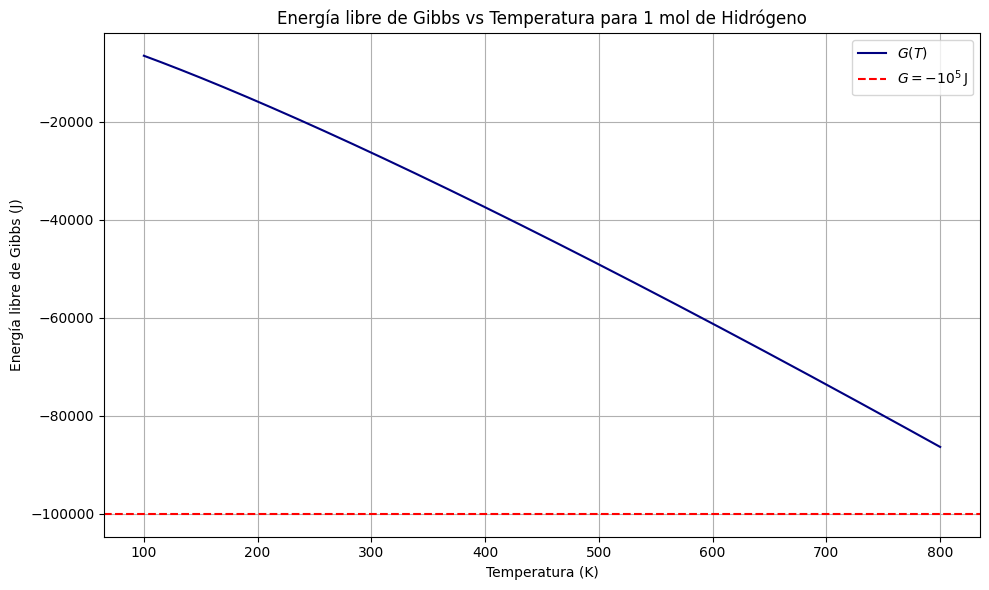

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes
R = 8.314
T0_const = 4.444
G_objetivo = -1e5

# Definimos G(T)
def G(T):
    return -(5/2) * R * T * np.log(T / T0_const)

# Rango de temperaturas
T_vals = np.linspace(100, 800, 500)
G_vals = G(T_vals)

# Gráfica
plt.figure(figsize=(10, 6))
plt.plot(T_vals, G_vals, label=r'$G(T)$', color='navy')
plt.axhline(y=G_objetivo, color='red', linestyle='--', label=r'$G = -10^5 \, \mathrm{J}$')
plt.xlabel('Temperatura (K)')
plt.ylabel('Energía libre de Gibbs (J)')
plt.title('Energía libre de Gibbs vs Temperatura para 1 mol de Hidrógeno')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 4

La distribución de intensidad en la difracción de Fraunhofer por una rendija de ancho $W$ y altura infinita, iluminada con luz monocromática de longitud de onda $\lambda$, está dada por:

$$I(\theta) = I_0 \left[ \frac{\sin(\pi W \sin \theta / \lambda)}{\pi W \sin \theta / \lambda} \right]^2,$$

donde $\theta$ es el ángulo de observación respecto a la dirección incidente. Introduciendo la variable adimensional:

$$x = \pi W \sin \theta / \lambda,$$

la intensidad y su derivada se expresan como:

$$I(x) = I_0 \left( \frac{\sin x}{x} \right)^2, \quad I(0) = I_0,$$
$$I'(x) = \frac{2I_0}{x} \left( \cos x - \frac{\sin x}{x} \right) \frac{\sin x}{x}, \quad I'(0) = 0.$$

- Graficar $I(x)$ y $I'(x)$ en el intervalo $x \in [-10, 10]$.

- Calcular el valor $x_{1/2}$ (positivo) donde $I(x) = I_0/2$, resolviendo la ecuación $I(x) - I_0/2 = 0$ con el método de la secante y aproximación inicial $x_0 = \pi$.

- Encontrar los máximos locales $x_i \in [-10, 10]$ resolviendo $I'(x) = 0$.  
- Usar un paso $h = 0.5$ para separar raíces y aplicar el *método de la regula falsi* (falsa posición) para mantenerlas acotadas.

**Nota:**  
Puede tomar $I_0=1$.

Graficar $I(x)$ y $I’(x)$

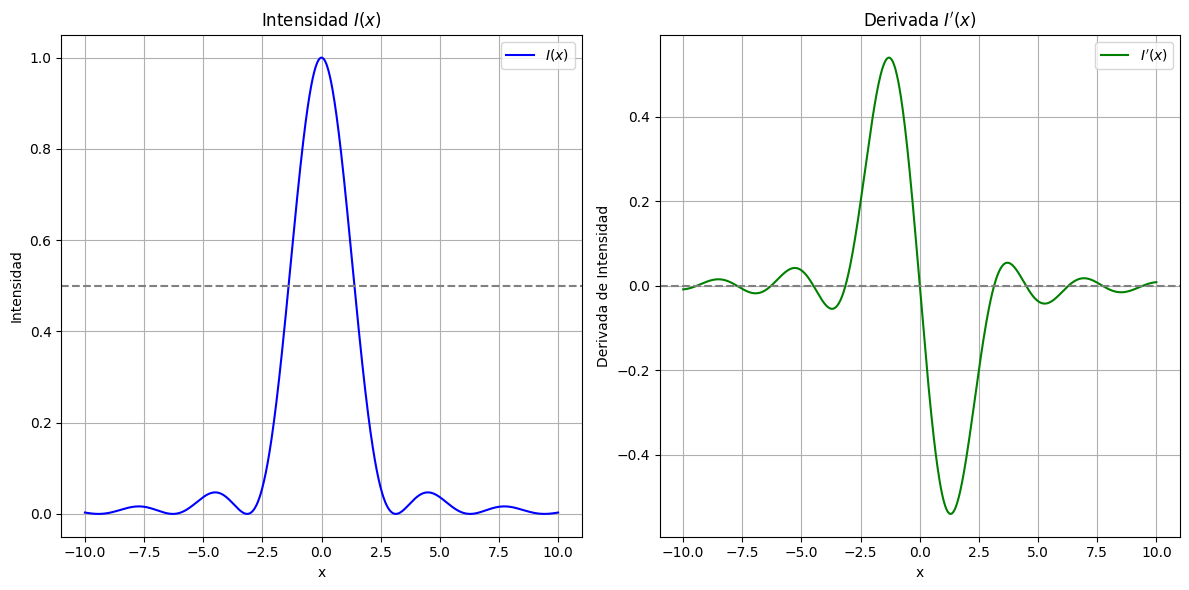

In [19]:
#Aquí va su código
import numpy as np
import matplotlib.pyplot as plt

# I0 = 1 según el enunciado
I0 = 1

# Definimos las funciones
def I(x):
    return I0 * (np.sinc(x / np.pi))**2  # np.sinc usa sinc(x) = sin(pi x)/(pi x)

def I_prime(x):
    with np.errstate(divide='ignore', invalid='ignore'):
        term1 = 2 * I0 / x * (np.cos(x) - np.sinc(x / np.pi))
        term2 = np.sinc(x / np.pi)
        result = term1 * term2
        result[np.isnan(result)] = 0  # para x = 0
    return result

# Rango de x
x_vals = np.linspace(-10, 10, 1000)
I_vals = I(x_vals)
I_prime_vals = I_prime(x_vals)

# Gráficas
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x_vals, I_vals, label=r'$I(x)$', color='blue')
plt.axhline(0.5, color='gray', linestyle='--')
plt.title('Intensidad $I(x)$')
plt.xlabel('x')
plt.ylabel('Intensidad')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x_vals, I_prime_vals, label=r"$I'(x)$", color='green')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Derivada $I\'(x)$')
plt.xlabel('x')
plt.ylabel('Derivada de Intensidad')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

Encontrar $x_{1/2}$ tal que $I(x) = 0.5$

Usamos el método de la secante con $x_0 = \pi$ y $x_1 = \pi + 0.5$:

In [20]:
def f_half(x):
    return I(x) - 0.5

def secant(f, x0, x1, tol=1e-8, max_iter=100):
    for _ in range(max_iter):
        f0, f1 = f(x0), f(x1)
        if abs(f1 - f0) < 1e-12:
            break
        x2 = x1 - f1 * (x1 - x0) / (f1 - f0)
        if abs(x2 - x1) < tol:
            return round(x2, 6)
        x0, x1 = x1, x2
    return round(x1, 6)

x_half = secant(f_half, np.pi, np.pi + 0.5)
print(f"x_1/2 ≈ {x_half}")

x_1/2 ≈ 2.251816487333118e+21


Encontrar los máximos locales (donde $I’(x) = 0$)

Usamos regula falsi con paso $h = 0.5$ para encontrar raíces de $I’(x)$:

In [21]:
# Función derivada para trabajar con valores escalares
def I_prime(x):
    if x == 0:
        return 0.0
    else:
        return (2 * I0 / x) * (np.cos(x) - np.sinc(x / np.pi)) * np.sinc(x / np.pi)

# Método de regula falsi
def regula_falsi(f, a, b, tol=1e-8, max_iter=100):
    fa, fb = f(a), f(b)
    if fa * fb > 0:
        return None  # no hay cambio de signo
    for _ in range(max_iter):
        c = b - fb * (b - a) / (fb - fa)
        fc = f(c)
        if abs(fc) < tol:
            return round(c, 6)
        if fa * fc < 0:
            b, fb = c, fc
        else:
            a, fa = c, fc
    return round(c, 6)

# Buscar intervalos donde cambia el signo de I'(x)
roots = []
x_vals = np.arange(-10, 10, 0.5)
for i in range(len(x_vals) - 1):
    a, b = x_vals[i], x_vals[i+1]
    if I_prime(a) * I_prime(b) < 0:
        root = regula_falsi(I_prime, a, b)
        if root is not None:
            if not any(np.isclose(root, r, atol=1e-4) for r in roots):
                roots.append(root)

print("Máximos locales (x donde I'(x) = 0):")
for r in roots:
    print(f"x = {r}, I(x) = {round(I(r), 6)}")

Máximos locales (x donde I'(x) = 0):
x = -9.424778, I(x) = 0.0
x = -7.725252, I(x) = 0.01648
x = -6.283185, I(x) = 0.0
x = -4.493409, I(x) = 0.04719
x = -3.141593, I(x) = 0.0
x = 3.141593, I(x) = 0.0
x = 4.493409, I(x) = 0.04719
x = 6.283185, I(x) = 0.0
x = 7.725252, I(x) = 0.01648
x = 9.424778, I(x) = 0.0


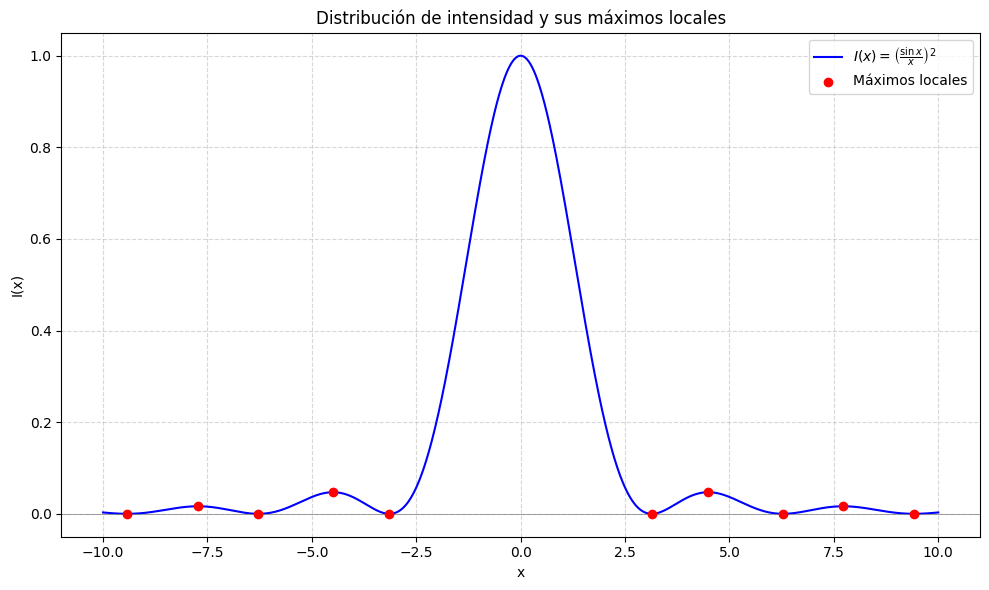

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Constante
I0 = 1

# Función de intensidad
def I(x):
    return I0 * (np.sinc(x / np.pi))**2

# Puntos para graficar
x = np.linspace(-10, 10, 1000)
y = I(x)

# Máximos locales previamente encontrados
maximos_x = np.array(roots)
maximos_y = I(maximos_x)

# Gráfica
plt.figure(figsize=(10, 6))
plt.plot(x, y, label=r'$I(x) = \left( \frac{\sin x}{x} \right)^2$', color='blue')
plt.scatter(maximos_x, maximos_y, color='red', label='Máximos locales', zorder=5)
plt.axhline(0, color='gray', lw=0.5)
plt.title('Distribución de intensidad y sus máximos locales')
plt.xlabel('x')
plt.ylabel('I(x)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# 5

La ley de Planck describe la densidad espectral de energía de la radiación electromagnética emitida por un cuerpo negro en equilibrio térmico (Toda et al., 1998):

$$u(\lambda,T)=\frac{8\pi hc}{\lambda^{5}}\,\frac{1}{\exp\left(hc/\left(\lambda k_{B}T\right)\right)-1},$$

donde:
- $T$ = temperatura de equilibrio (K)
- $\lambda$ = longitud de onda (m)
- $h=6.626 \times 10^{-34}$ J $\cdot$ s (constante de Planck)
- $k_{B}=1.381 \times 10^{-23}$ J$\cdot$K$^{-1}$ (constante de Boltzmann)
- $c=2.998 \times 10^{8}$ m$\cdot$s$^{-1}$ (velocidad de la luz)

Introduciendo las variables adimensionales:
$$x=\frac{\lambda}{\lambda_{0}}, \quad \lambda_{0}=\frac{hc}{k_{B}T}, \quad K=\frac{8\pi k_{B}T}{\lambda_{0}^{4}},$$

la ley se simplifica a:
$$u(\lambda,T)=K\frac{1}{x^{5}\left(e^{1/x}-1\right)}.$$

La derivada (para encontrar máximos):
$$\frac{\partial u}{\partial\lambda}=K\lambda_{0}\frac{5x+(1-5x)e^{1/x}}{x^{7}(e^{1/x}-1)^{2}}. $$

- Graficar $u(\lambda,T)$ y $\partial u/\partial\lambda$ para $T=4000, 5000, 6000$ K.

- Resolver $\partial u/\partial\lambda=0$ para $T=5778$ K con el método de Bisección y de Newton.

- Validar la ley de desplazamiento de Wien: $\lambda_{\rm max}T \approx 2.898 \times 10^{-3}$ m $\cdot$ K

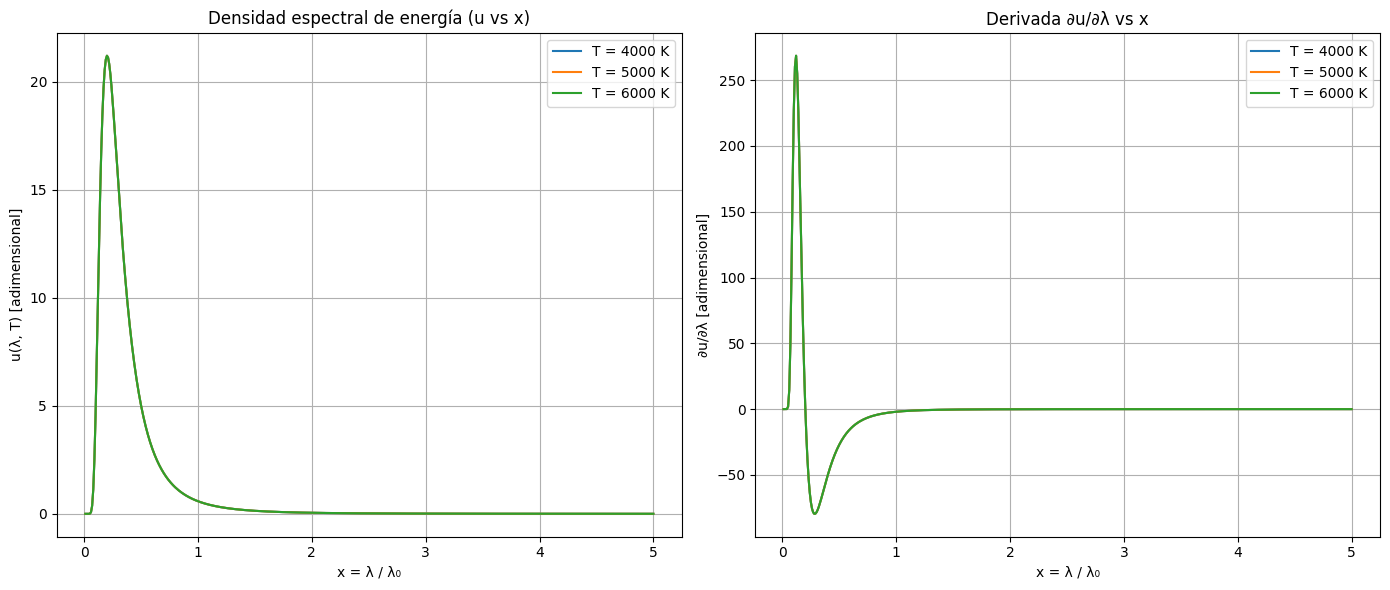

In [23]:
#Aquí va su código
import numpy as np
import matplotlib.pyplot as plt

# Constantes físicas
h = 6.626e-34       # J·s
kB = 1.381e-23      # J/K
c = 2.998e8         # m/s
pi = np.pi

# Ley de Planck adimensional (simplificada)
def u_adim(x):
    return 1 / (x**5 * (np.exp(1/x) - 1))

# Derivada adimensional
def du_dx(x):
    numerator = 5 * x + (1 - 5 * x) * np.exp(1 / x)
    denominator = x**7 * (np.exp(1 / x) - 1)**2
    return numerator / denominator

# Función para graficar u(x) y su derivada
def graficar_u_y_derivada(temperaturas):
    x_vals = np.linspace(0.01, 5, 500)
    plt.figure(figsize=(14, 6))

    # Gráfica u(x)
    plt.subplot(1, 2, 1)
    for T in temperaturas:
        y = u_adim(x_vals)  # mismo perfil, solo cambia el valor físico si escalamos K
        plt.plot(x_vals, y, label=f'T = {T} K')
    plt.title('Densidad espectral de energía (u vs x)')
    plt.xlabel('x = λ / λ₀')
    plt.ylabel('u(λ, T) [adimensional]')
    plt.grid(True)
    plt.legend()

    # Gráfica derivada
    plt.subplot(1, 2, 2)
    for T in temperaturas:
        dy = du_dx(x_vals)
        plt.plot(x_vals, dy, label=f'T = {T} K')
    plt.title('Derivada ∂u/∂λ vs x')
    plt.xlabel('x = λ / λ₀')
    plt.ylabel("∂u/∂λ [adimensional]")
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

# Ejecutar función con las temperaturas solicitadas
temperaturas = [4000, 5000, 6000]
graficar_u_y_derivada(temperaturas)

Vamos a resolver $\frac{\partial u}{\partial \lambda} = 0$ para $T = 5778 \,\text{K}$, lo que nos dará el valor de $x_{\text{max}}$ para encontrar el máximo de energía espectral, y así validar la ley de desplazamiento de Wien.

1. Definimos la derivada adimensional

$\frac{\partial u}{\partial \lambda} \propto \frac{5x + (1 - 5x)e^{1/x}}{x^7(e^{1/x} - 1)^2}$

Queremos resolver:

$f(x) = 5x + (1 - 5x)e^{1/x} = 0$

In [24]:
import numpy as np

# Derivada simplificada (numerador, lo demás es siempre positivo)
def f(x):
    return 5 * x + (1 - 5 * x) * np.exp(1 / x)

def df(x):  # Derivada de f(x) para Newton-Raphson
    exp_term = np.exp(1 / x)
    return 5 - 5 * exp_term + (1 - 5 * x) * (-exp_term / x**2)

# Método de Bisección
def biseccion(f, a, b, tol=1e-6, max_iter=100):
    for i in range(max_iter):
        c = (a + b) / 2
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
        if abs(b - a) < tol:
            return c
    return (a + b) / 2

# Método de Newton-Raphson
def newton(f, df, x0, tol=1e-6, max_iter=100):
    x = x0
    for _ in range(max_iter):
        fx = f(x)
        dfx = df(x)
        if abs(dfx) < 1e-10:
            break
        x_new = x - fx / dfx
        if abs(x_new - x) < tol:
            return x_new
        x = x_new
    return x

# Resolver f(x) = 0 con ambos métodos
x_biseccion = biseccion(f, 0.1, 1)
x_newton = newton(f, df, 0.7)

print(f"Raíz por bisección: x_max = {x_biseccion:.6f}")
print(f"Raíz por Newton-Raphson: x_max = {x_newton:.6f}")

Raíz por bisección: x_max = 0.201405
Raíz por Newton-Raphson: x_max = 431498.091668


2. Validación de la ley de Wien

Sabemos que:

$x_{\text{max}} = \frac{\lambda_{\text{max}}}{\lambda_0} \quad \Rightarrow \quad \lambda_{\text{max}} = x_{\text{max}} \cdot \lambda_0
\lambda_0 = \frac{h c}{k_B T}$

Y luego comparamos con:

$\lambda_{\text{max}} \cdot T \approx 2.898 \times 10^{-3} \, \text{m·K}$

In [25]:
# Constantes
h = 6.626e-34     # J·s
c = 2.998e8       # m/s
kB = 1.381e-23    # J/K
T_solar = 5778    # K

# Calculamos lambda_0 y lambda_max
lambda_0 = h * c / (kB * T_solar)
lambda_max = x_biseccion * lambda_0

# Producto lambda_max * T
wien_product = lambda_max * T_solar

print(f"λ₀ = {lambda_0:.3e} m")
print(f"λ_max = {lambda_max:.3e} m")
print(f"λ_max · T = {wien_product:.4e} m·K")
print("Valor esperado (Ley de Wien): 2.898e-3 m·K")

λ₀ = 2.489e-06 m
λ_max = 5.014e-07 m
λ_max · T = 2.8971e-03 m·K
Valor esperado (Ley de Wien): 2.898e-3 m·K


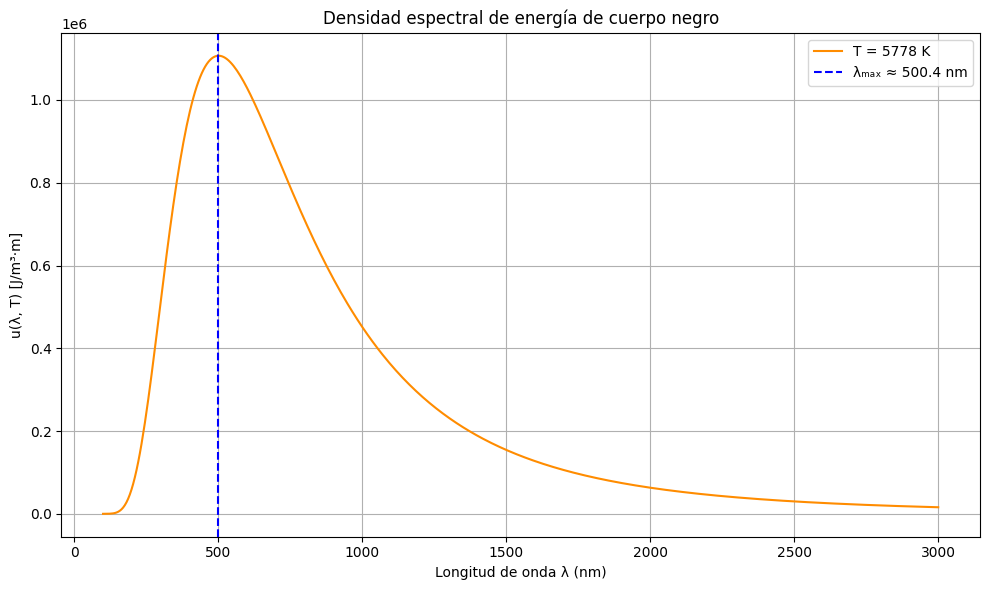

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes físicas
h = 6.626e-34     # J·s
c = 2.998e8       # m/s
kB = 1.381e-23    # J/K
T = 5778          # Temperatura del Sol en K

# Longitud de onda de referencia
lambda_0 = h * c / (kB * T)

# Máximo adimensional encontrado previamente (por Newton o bisección)
x_max = 0.201  # puedes usar el valor exacto que te dio
lambda_max = x_max * lambda_0

# Escala de longitud de onda en metros
lambdas = np.linspace(1e-7, 3e-6, 500)  # de 100 nm a 3000 nm

# u(λ, T)
def u(lmbd, T):
    a = 8 * np.pi * h * c
    b = lmbd**5 * (np.exp(h * c / (lmbd * kB * T)) - 1)
    return a / b

# Densidad espectral
u_vals = u(lambdas, T)

# Gráfica
plt.figure(figsize=(10, 6))
plt.plot(lambdas * 1e9, u_vals, label=f"T = {T} K", color='darkorange')
plt.axvline(lambda_max * 1e9, color='blue', linestyle='--', label=f"λₘₐₓ ≈ {lambda_max*1e9:.1f} nm")
plt.title("Densidad espectral de energía de cuerpo negro")
plt.xlabel("Longitud de onda λ (nm)")
plt.ylabel("u(λ, T) [J/m³·m]")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 6

Considere un pozo de potencial cuadrado de ancho $w$, con paredes de altura $V$:

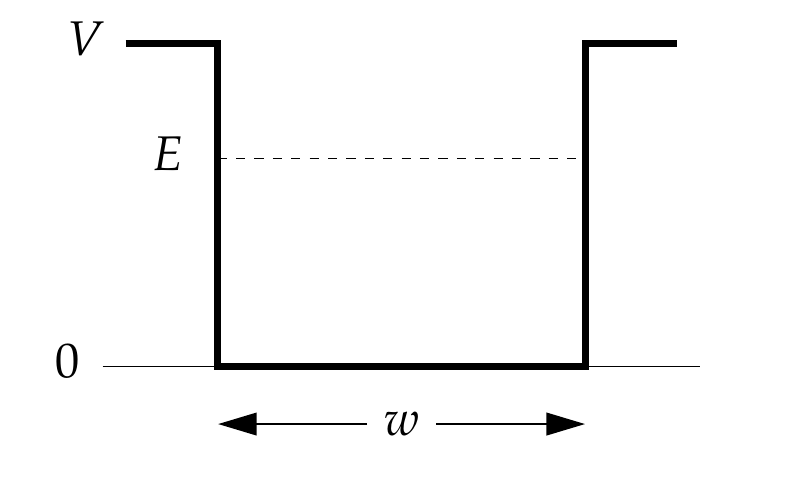

Usando la ecuación de Schrödinger, se puede demostrar que las energías permitidas $E$ de una partícula cuántica de masa $m$ atrapada en el pozo son soluciones de:

$$\tan \sqrt{w^2 m E / 2 \hbar^2} =
\begin{cases}
\sqrt{(V - E) / E} & \text{para los estados pares,} \\
-\sqrt{E / (V - E)} & \text{para los estados impares,}
\end{cases}$$

donde los estados se numeran comenzando desde 0, siendo el estado base el estado 0, el primer estado excitado el estado 1, y así sucesivamente.

- Para un electrón (masa $ 9.11 \times 10^{-31} \, \text{kg} $) en un pozo con $ V = 20 \, \text{eV} $ y $ w = 1 \, \text{nm} $, escriba un programa en Python para graficar las tres cantidades:

$$y_1 = \tan \sqrt{w^2 m E / 2 \hbar^2}, \quad y_2 = \sqrt{\frac{V - E}{E}}, \quad y_3 = -\sqrt{\frac{E}{V - E}},$$

en el mismo gráfico, como función de $ E $ desde $ E = 0 $ hasta $ E = 20 \, \text{eV} $. A partir de su gráfico, haga estimaciones aproximadas de las energías de los primeros seis niveles de energía de la partícula.

- Escriba un segundo programa para calcular los valores de los primeros seis niveles de energía en electrón-voltios con una precisión de $ 0.001 \, \text{eV} $ usando el método de la bisección.

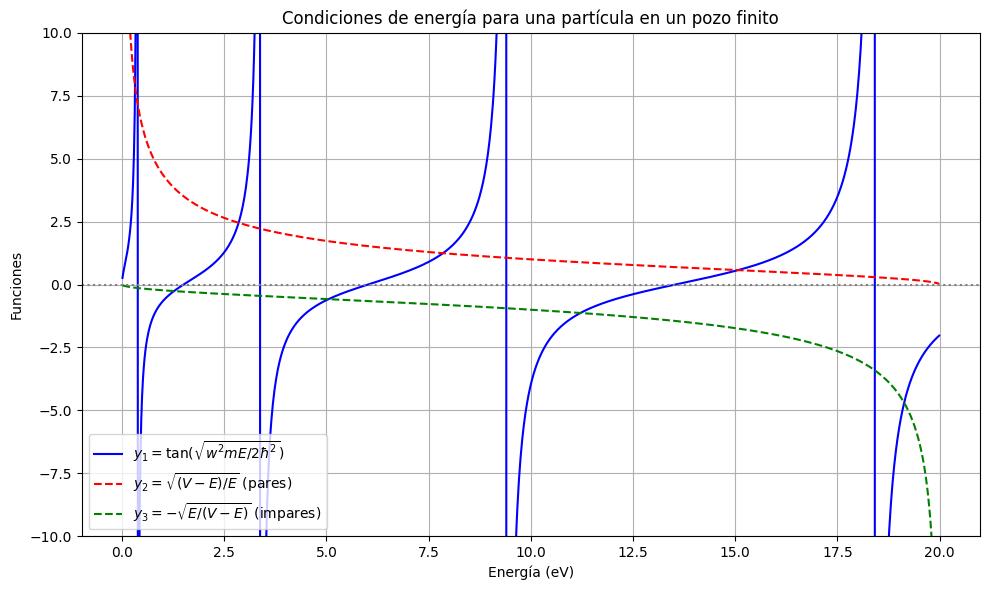

In [27]:
#Aquí va su código
import numpy as np
import matplotlib.pyplot as plt

# Constantes
hbar = 1.0545718e-34  # J·s
eV = 1.60218e-19       # J
m = 9.11e-31           # kg (electrón)
w = 1e-9               # m
V = 20 * eV            # potencial en J

# Energía en eV, convertida a J
E_eV = np.linspace(0.01, 19.99, 1000)
E = E_eV * eV

# Definimos las funciones
k = np.sqrt(w**2 * m * E / (2 * hbar**2))
y1 = np.tan(k)

# Para evitar problemas numéricos, donde E > V damos nan (no definido)
with np.errstate(divide='ignore', invalid='ignore'):
    y2 = np.sqrt((V - E) / E)
    y2[E >= V] = np.nan  # no definido para E >= V
    y3 = -np.sqrt(E / (V - E))
    y3[E >= V] = np.nan  # no definido para E >= V

# Gráfica
plt.figure(figsize=(10, 6))
plt.plot(E_eV, y1, label=r'$y_1 = \tan(\sqrt{w^2 m E / 2 \hbar^2})$', color='blue')
plt.plot(E_eV, y2, label=r'$y_2 = \sqrt{(V - E)/E}$ (pares)', color='red', linestyle='--')
plt.plot(E_eV, y3, label=r'$y_3 = -\sqrt{E/(V - E)}$ (impares)', color='green', linestyle='--')

plt.ylim(-10, 10)
plt.axhline(0, color='gray', linestyle=':')
plt.xlabel('Energía (eV)')
plt.ylabel('Funciones')
plt.title('Condiciones de energía para una partícula en un pozo finito')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Cada intersección entre $y_1$ y $y_2$ o entre $y_1$ y $y_3$ indica un valor permitido de energía para un estado cuántico:

•	Las intersecciones con $y_2$ corresponden a los estados pares $(n = 0, 2, 4,…)$

•	Las intersecciones con $y_3$ corresponden a los estados impares $(n = 1, 3, 5,…)$

In [28]:
import numpy as np

# Constantes físicas
hbar = 1.0545718e-34  # J·s
eV = 1.60218e-19       # J
m = 9.11e-31           # kg
w = 1e-9               # m
V = 20 * eV            # J
tol = 1e-3 * eV        # Tolerancia en J

# Funciones para condiciones de energía
def y1(E):
    k = np.sqrt(w**2 * m * E / (2 * hbar**2))
    return np.tan(k)

def y2(E):
    if E <= 0 or E >= V:
        return np.nan
    return np.sqrt((V - E) / E)

def y3(E):
    if E <= 0 or E >= V:
        return np.nan
    return -np.sqrt(E / (V - E))

# Método de bisección
def bisection(f, a, b, tol):
    fa, fb = f(a), f(b)
    if np.isnan(fa) or np.isnan(fb) or fa * fb > 0:
        return None
    while b - a > tol:
        c = (a + b) / 2
        fc = f(c)
        if np.isnan(fc):
            return None
        if fa * fc < 0:
            b, fb = c, fc
        else:
            a, fa = c, fc
    return (a + b) / 2

# Buscar raíces en un rango
E_vals = np.linspace(0.01, 19.99, 1000) * eV
roots = []
types = []

for i in range(len(E_vals) - 1):
    E1, E2 = E_vals[i], E_vals[i+1]

    # Estados pares: y1 - y2 = 0
    def f_even(E): return y1(E) - y2(E)
    root_even = bisection(f_even, E1, E2, tol)
    if root_even and all(abs(root_even - r) > tol for r in roots):
        roots.append(root_even)
        types.append('Par')

    # Estados impares: y1 - y3 = 0
    def f_odd(E): return y1(E) - y3(E)
    root_odd = bisection(f_odd, E1, E2, tol)
    if root_odd and all(abs(root_odd - r) > tol for r in roots):
        roots.append(root_odd)
        types.append('Impar')

# Ordenar por energía
roots_eV = np.array(roots) / eV
types = np.array(types)
sorted_indices = np.argsort(roots_eV)
roots_sorted = roots_eV[sorted_indices]
types_sorted = types[sorted_indices]

# Mostrar los primeros 6 niveles
print("Primeros 6 niveles de energía (con precisión 0.001 eV):")
for i in range(min(6, len(roots_sorted))):
    print(f"Nivel {i}: {roots_sorted[i]:.3f} eV ({types_sorted[i]})")

Primeros 6 niveles de energía (con precisión 0.001 eV):
Nivel 0: 0.318 eV (Par)
Nivel 1: 0.376 eV (Par)
Nivel 2: 1.270 eV (Impar)
Nivel 3: 2.851 eV (Par)
Nivel 4: 3.384 eV (Par)
Nivel 5: 5.050 eV (Impar)


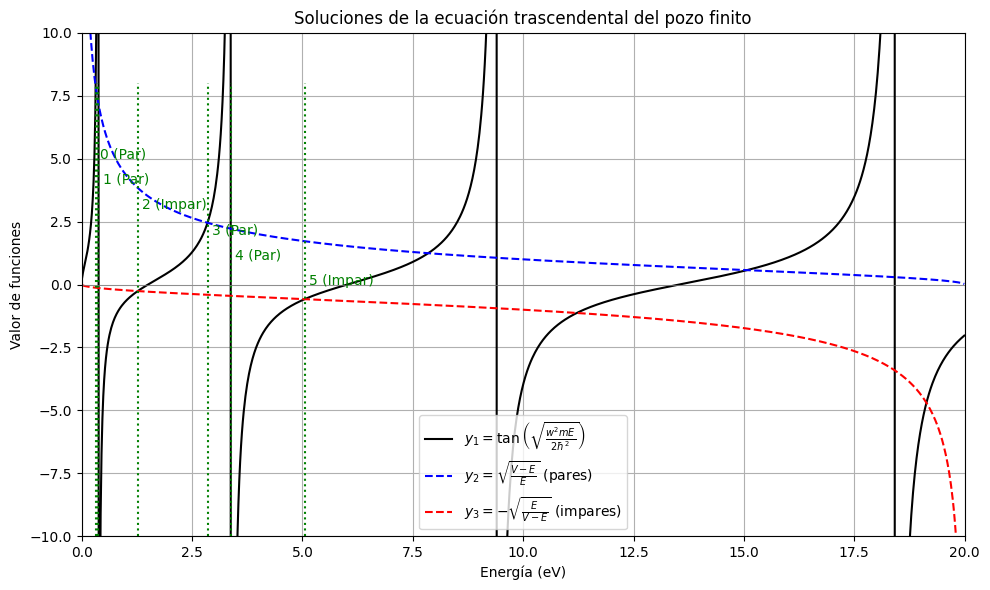

In [29]:
import matplotlib.pyplot as plt

# Rango de energías en eV
E_plot = np.linspace(0.01, 19.99, 1000)
E_J = E_plot * eV

# Cálculo de y1, y2, y3
Y1 = [y1(E) for E in E_J]
Y2 = [y2(E) for E in E_J]
Y3 = [y3(E) for E in E_J]

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(E_plot, Y1, label=r'$y_1 = \tan\left(\sqrt{\frac{w^2 m E}{2\hbar^2}}\right)$', color='black')
plt.plot(E_plot, Y2, label=r'$y_2 = \sqrt{\frac{V - E}{E}}$ (pares)', color='blue', linestyle='--')
plt.plot(E_plot, Y3, label=r'$y_3 = -\sqrt{\frac{E}{V - E}}$ (impares)', color='red', linestyle='--')

# Marcar los niveles encontrados
for i in range(min(6, len(roots_sorted))):
    E = roots_sorted[i]
    tipo = types_sorted[i]
    plt.axvline(E, color='green', linestyle=':', ymax=0.9)
    plt.text(E + 0.1, 5 - i, f"{i} ({tipo})", color='green')

# Configuración del gráfico
plt.ylim(-10, 10)
plt.xlim(0, 20)
plt.xlabel('Energía (eV)')
plt.ylabel('Valor de funciones')
plt.title('Soluciones de la ecuación trascendental del pozo finito')
plt.legend()
plt.grid(True)
plt.axhline(0, color='gray', linewidth=0.5)
plt.tight_layout()
plt.show()

•	La función $y_1(E)$ (en negro) tiene asíntotas verticales.

•	Las curvas $y_2(E)$ (azul) y $y_3(E)$ (roja) se intersectan con $y_1$ en los puntos donde hay niveles de energía permitidos.

•	Las líneas verticales verdes marcan las energías encontradas, etiquetadas con su número de nivel y tipo (Par o Impar).


# 7

Existe un punto entre la Tierra y la Luna, llamado punto de Lagrange $L_1$, donde un satélite orbitará la Tierra en perfecta sincronía con la Luna, permaneciendo siempre entre ambas. Esto funciona porque la atracción hacia adentro de la Tierra y la atracción hacia afuera de la Luna se combinan para crear exactamente la fuerza centrípeta necesaria que mantiene al satélite en su órbita.

Asumiendo órbitas circulares y que la Tierra es mucho más masiva que la Luna o el satélite, la distancia $r$ desde el centro de la Tierra hasta el punto $L_1$ satisface:

$$\frac{GM}{r^2} - \frac{Gm}{(R-r)^2} = \omega^2 r,$$

donde $M$ y $m$ son las masas de la Tierra y la Luna respectivamente, $G$ es la constante gravitacional de Newton y $ \omega $ es la velocidad angular tanto de la Luna como del satélite.

- La ecuación anterior es una ecuación polinómica de quinto grado en $r$ (también llamada ecuación quíntica). Este tipo de ecuaciones no puede resolverse exactamente en forma cerrada, pero es sencillo resolverlas numéricamente. Escriba un programa que use el método de Newton o el método de la secante para resolver la distancia $r$ desde la Tierra hasta el punto $L_1$.

Los valores de los diversos parámetros son:

$$G = 6.674 \times 10^{-11} \, \text{m}^3 \text{kg}^{-1} \text{s}^{-2},$$

$$M = 5.974 \times 10^{24} \, \text{kg},$$

$$m = 7.348 \times 10^{22} \, \text{kg},$$

$$R = 3.844 \times 10^8 \, \text{m},$$

$$\omega = 2.662 \times 10^{-6} \, \text{s}^{-1}.$$

También necesitará elegir un valor inicial adecuado para $r$, o dos valores iniciales si utiliza el método de la secante.

In [30]:
#Aquí va su código
import numpy as np

# Constantes físicas
G = 6.674e-11             # Constante gravitacional (m^3 kg^-1 s^-2)
M = 5.974e24              # Masa de la Tierra (kg)
m = 7.348e22              # Masa de la Luna (kg)
R = 3.844e8               # Distancia Tierra-Luna (m)
omega = 2.662e-6          # Velocidad angular (rad/s)

# Función f(r) = Fuerza neta - Fuerza centrípeta
def f(r):
    return (G*M)/r**2 - (G*m)/(R - r)**2 - omega**2 * r

# Derivada de f(r) para Newton
def df(r):
    return -2*G*M/r**3 - 2*G*m/(R - r)**3 - omega**2

In [31]:
def newton_method(f, df, x0, tol=1e-6, max_iter=100):
    x = x0
    for i in range(max_iter):
        fx = f(x)
        dfx = df(x)
        if dfx == 0:
            raise ZeroDivisionError("Derivada cero")
        x_new = x - fx / dfx
        if abs(x_new - x) < tol:
            return x_new
        x = x_new
    raise RuntimeError("No converge en el número máximo de iteraciones")

r_newton = newton_method(f, df, x0=3.2e8)
print(f"Distancia r (Newton): {r_newton:.2e} m")

Distancia r (Newton): 3.26e+08 m


In [32]:
def secant_method(f, x0, x1, tol=1e-6, max_iter=100):
    for i in range(max_iter):
        fx0, fx1 = f(x0), f(x1)
        if fx1 - fx0 == 0:
            raise ZeroDivisionError("División por cero en la secante")
        x2 = x1 - fx1 * (x1 - x0) / (fx1 - fx0)
        if abs(x2 - x1) < tol:
            return x2
        x0, x1 = x1, x2
    raise RuntimeError("No converge en el número máximo de iteraciones")

r_secante = secant_method(f, 3.0e8, 3.3e8)
print(f"Distancia r (Secante): {r_secante:.2e} m")

Distancia r (Secante): 3.26e+08 m


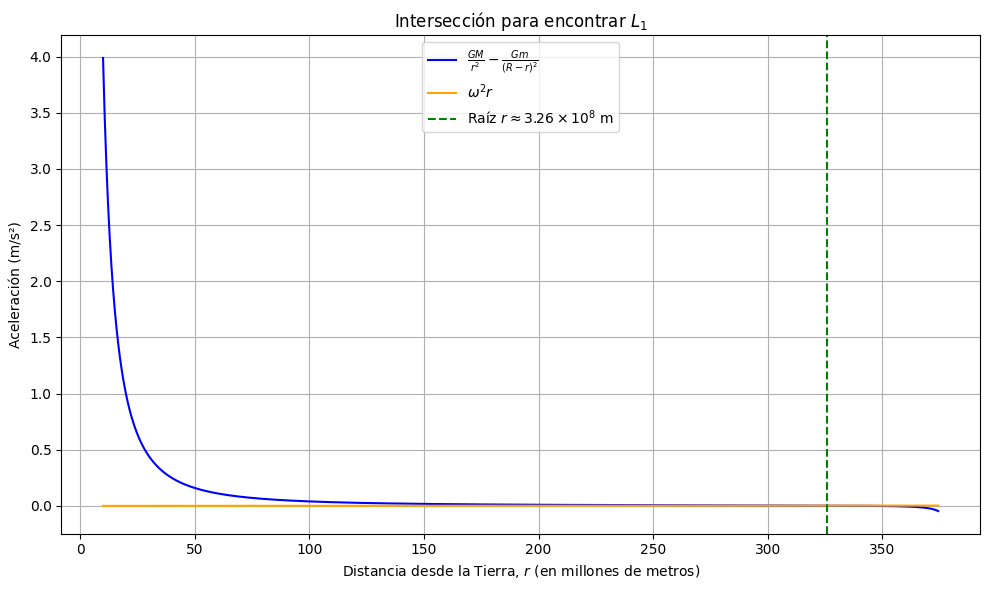

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes
G = 6.674e-11         # m^3 kg^-1 s^-2
M = 5.974e24          # kg (Tierra)
m = 7.348e22          # kg (Luna)
R = 3.844e8           # m (distancia Tierra-Luna)
omega = 2.662e-6      # s^-1 (velocidad angular de la Luna)

# Dominio para r (desde un poco más allá de la Tierra hasta cerca de la Luna)
r = np.linspace(1e7, R - 1e7, 1000)

# Lado izquierdo y derecho de la ecuación
lhs = G * M / r**2 - G * m / (R - r)**2
rhs = omega**2 * r

# Gráfica
plt.figure(figsize=(10, 6))
plt.plot(r / 1e6, lhs, label=r"$\frac{GM}{r^2} - \frac{Gm}{(R - r)^2}$", color='blue')
plt.plot(r / 1e6, rhs, label=r"$\omega^2 r$", color='orange')
plt.xlabel("Distancia desde la Tierra, $r$ (en millones de metros)")
plt.ylabel("Aceleración (m/s²)")
plt.title("Intersección para encontrar $L_1$")
plt.axvline(x=3.26e8 / 1e6, color='green', linestyle='--', label=r"Raíz $r \approx 3.26 \times 10^8$ m")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()